In [27]:
import pandas as pd
from pathlib import Path
import matplotlib.pyplot as plt
import scipy.stats as st
import seaborn as sns

In [6]:
# make referances to csv file paths
clen_data_path = Path("breast_cancer3.csv")
unclean_data_path  = Path("uncleandata.csv")

# Read csv files to create dataframes
clean_df = pd.read_csv(clen_data_path)
unclean_df  = pd.read_csv(unclean_data_path)
clean_df.head()


,age1,age,menopause,tumor-size,inv-nodes,node-caps,deg-malig,breast,breast-quad,irradiat,Class
0,40-49,45,premeno,15-19,0-2,yes,3,right,left_up,no,recurrence-events
1,40-50,45,ge40,15-19,0-2,no,1,right,central,no,no-recurrence-events
2,40-51,46,ge40,35-39,0-2,no,2,left,left_low,no,recurrence-events
3,40-52,46,premeno,35-39,0-2,yes,3,right,left_low,yes,no-recurrence-events
4,40-53,47,premeno,30-34,3-5,yes,2,left,right_up,no,recurrence-events


In [5]:
unclean_df.head()

,Age,Race,Marital Status,T Stage,N Stage,6th Stage,differentiate,Grade,A Stage,Tumor Size,Estrogen Status,Progesterone Status,Regional Node Examined,Reginol Node Positive,Survival Months,Status
0,68,White,Married,T1,N1,IIA,Poorly differentiated,3,Regional,4,Positive,Positive,24,1,60,Alive
1,50,White,Married,T2,N2,IIIA,Moderately differentiated,2,Regional,35,Positive,Positive,14,5,62,Alive
2,58,White,Divorced,T3,N3,IIIC,Moderately differentiated,2,Regional,63,Positive,Positive,14,7,75,Alive
3,58,White,Married,T1,N1,IIA,Poorly differentiated,3,Regional,18,Positive,Positive,2,1,84,Alive
4,47,White,Married,T2,N1,IIB,Poorly differentiated,3,Regional,41,Positive,Positive,3,1,50,Alive


In [19]:
#Identify colums of interest in both dataframes
clean_columns = clean_df[['menopause', 'deg-malig']]
unclean_columns = unclean_df[['Age', 'Tumor Size', 'A Stage']]

#Combined the selected columns
cancer_data_df = pd.concat([unclean_columns, clean_columns], axis =1)
cancer_data_df.head()

,Age,Tumor Size,A Stage,menopause,deg-malig
0,68,4,Regional,premeno,3.0
1,50,35,Regional,ge40,1.0
2,58,63,Regional,ge40,2.0
3,58,18,Regional,premeno,3.0
4,47,41,Regional,premeno,2.0


In [33]:
# describe to understand the data
cancer_data_df.describe()

,Age,Tumor Size,deg-malig
count,4024.000000,4024.000000,286.000000
mean,53.972167,30.473658,2.048951
std,8.963134,21.119696,0.738217
min,30.000000,1.000000,1.000000
25%,47.000000,16.000000,2.000000
50%,54.000000,25.000000,2.000000
75%,61.000000,38.000000,3.000000
max,69.000000,140.000000,3.000000


In [36]:
# rename values in menopause columns to meaningful data
cancer_data_df['menopause'].replace({"premeno":"premenopausal"}, inplace= True)
cancer_data_df['menopause'].replace({"lt40":"early onset menopause"}, inplace= True)
cancer_data_df['menopause'].replace({"ge40":"late onset menopause"}, inplace= True)

menop = cancer_data_df['menopause'].value_counts()
menop

menopause
premenopausal            150
late onset menopause     129
early onset menopause      7
Name: count, dtype: int64

In [45]:
#Group by menopause to learn A stsge values
menopausal_data = cancer_data_df.groupby('menopause')['A Stage'].value_counts()
menopausal_data

menopause              A Stage 
early onset menopause  Regional      6
                       Distant       1
late onset menopause   Regional    124
                       Distant       5
premenopausal          Regional    147
                       Distant       3
Name: count, dtype: int64

[Text(0.5, 1.0, 'Menopause vs A Stage')]

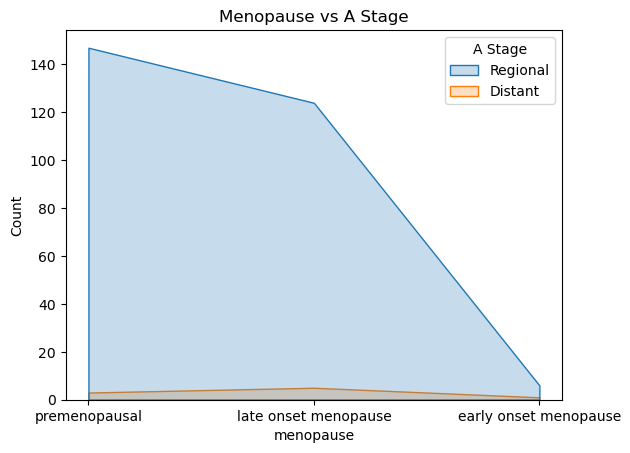

In [64]:
#Histogram using Seaborn to show the relationship between menopause and A stage
sns.histplot(data=cancer_data_df, x="menopause", hue= "A Stage", element="poly").set(title= "Menopause vs A Stage")

<function matplotlib.pyplot.show(close=None, block=None)>

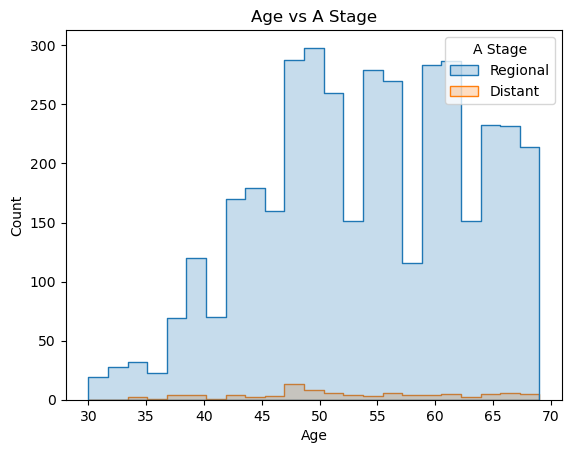

In [31]:
#Histogram using Seaborn to show the relationship between age and A stage
sns.histplot(data=cancer_data_df, x="Age", hue= "A Stage", element="step").set(title= "Age vs A Stage")

